PROC RANK
==============
split into 2 groups:  
0 if below median  
1 if above median  

In [37]:
PROC FORMAT;
    VALUE AGRPFMT 0='CTRL' 1='TRT';
RUN;
    
DATA QUESTIONNAIRE;
INPUT @1 ID$ 4. @5 DOB MMDDYY8. @13 ST_DATE MMDDYY8. @21 END_DATE MMDDYY8. @29 SALES 5.;
FORMAT 	DOB 		MMDDYY8.
	 	ST_DATE 	MMDDYY8.
		END_DATE 	MMDDYY8.
		SALES_YR	DOLLAR8.;

AGE = int(yrdif(DOB, Today(), 'Actual'));
ST_DATE_INT= int(yrdif(ST_DATE, Today(), 'Actual'));
END_DATE_INT= int(yrdif(END_DATE, Today(), 'Actual'));
LENGHT_WORK = ST_DATE_INT - END_DATE_INT;
SALES_YR = LENGHT_WORK * SALES;
AGEGRP=RANUNI(8888);
DATALINES;
001 1021194611121980122819887343
002 0913195502021980020419882123
005 0606194003121981031220043000
003 0705194411151980111320009544
008 0208196205211987031520104871
012 0918195803281982062420096218
024 0617197109151996021820111183
021 0426194807111978050320046814
019 1225196008121976032520037142
007 0606195907121980071920108364
;

PROC RANK DATA=QUESTIONNAIRE GROUPS=2 OUT=SPLIT;
    VAR AGEGRP;
RUN;

PROC SORT DATA=SPLIT;
    BY AGEGRP;
    WHERE AGEGRP EQ 0 OR AGEGRP EQ 1;
RUN;

PROC PRINT DATA=SPLIT NOOBS;
ID ID;
VAR DOB AGE LENGHT_WORK SALES_YR AGEGRP;
FORMAT AGEGRP AGRPFMT.;
RUN;


ID,DOB,AGE,LENGHT_WORK,SALES_YR,AGEGRP
002,09/13/55,61,8,"$16,984",CTRL
005,06/06/40,76,23,"$69,000",CTRL
003,07/05/44,72,20,"$190,880",CTRL
008,02/08/62,54,23,"$112,033",CTRL
019,12/25/60,56,27,"$192,834",CTRL
001,10/21/46,70,8,"$58,744",TRT
012,09/18/58,58,27,"$167,886",TRT
024,06/17/71,45,15,"$17,745",TRT
021,04/26/48,68,26,"$177,164",TRT
007,06/06/59,57,30,"$250,920",TRT


Paired TTEST - cannot use PROC TTEST
============================================
need to compute the difference scores ourselves and then use PROC MEANS to compute the probability that the difference is significantly different from zero.


In [43]:
DATA PAIRED;
INPUT CTIME TTIME;
DIFF=TIME-CTIME;
DATALINES;
90 95
867 92
100 104
80 98
95 101
90 105
;

PROC MEANS DATA=PAIRED N MEAN STDERR T PRT;
VAR DIFF;
RUN;

PROC TTEST
==================
CLASS: two group for test  
VAR: measurement for ttest


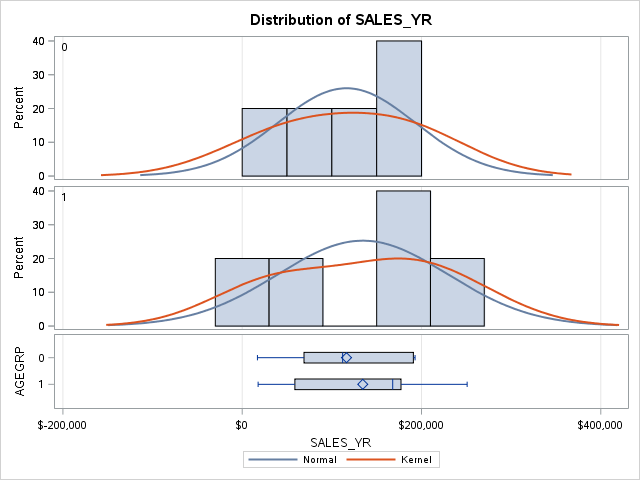
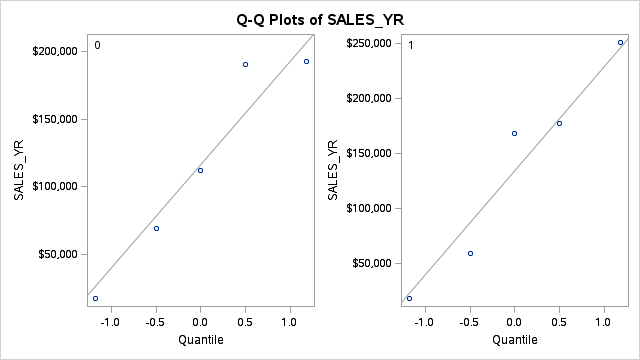

In [38]:
PROC TTEST DATA=SPLIT;
CLASS AGEGRP;
VAR SALES_YR;
RUN;

Wilcoxon Test - Nonparametric Ttest (no normal assumption)
================================================================
for example, a lot of value on ZEROS, causing skewness for distribution


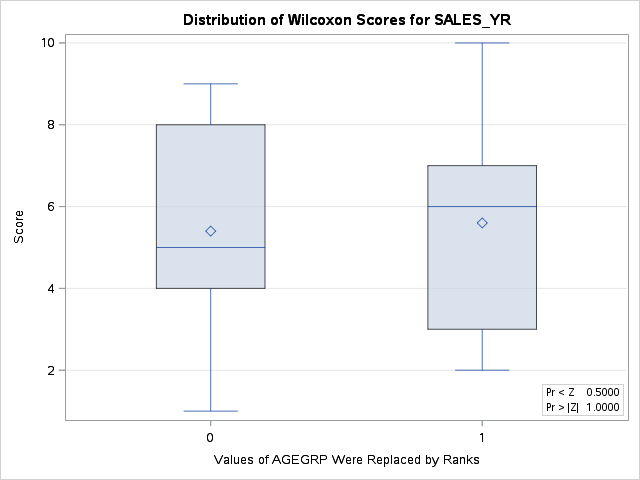

In [40]:
PROC NPAR1WAY DATA =SPLIT WILCOXON;
CLASS AGEGRP;
VAR SALES_YR;
EXACT WILCOXON;
RUN;

Fisher Exact Test
-------------------------
for two group of small categorical